# Data wrangling - Customer Lifetime Value Prediction & Segmentation Project


# Project Overview
This notebook presents the models and analysis conducted for forecasting total sales in a retail environment. Our goal is to identify the most accurate model using transactional data.

# Importing all the necessary libraries.

# Data Import and Overview
Here, we load the data and provide an initial exploration to understand the dataset's features, missing values, and basic statistics.

In [2]:
import pandas as pd




# Data Preprocessing
This section covers the preprocessing steps applied to the dataset, including handling of missing values, data transformation, and preparation for modeling.

# Load the data from the CSV file

In [3]:

data = pd.read_csv('/Users/satyaprakashchallagulla/Downloads/online_retail_II.csv')



# First look at the data

In [4]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Here for the dataset that i choose it has no null values and the dataset is pretty clean.
This makes the Data Wrangling work easy for me and in less steps.

# Deleting Non-Useful Columns

In [6]:
# Drop rows where 'Description' is missing
data.dropna(subset=['Description'], inplace=True)



# Filling the missing values

In [7]:
# Fill missing 'Customer ID' with a placeholder
data['Customer ID'].fillna(0, inplace=True)
data.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
# Remove rows with negative prices
data = data[data['Price'] >= 0]
data.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Handle negative quantities (assuming they are returns)

In [9]:

# If considering returns, this step might change
returns = data[data['Quantity'] < 0]
purchases = data[data['Quantity'] >= 0]
data.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
# Feature Engineering: Add 'Total Price' column
data['Total Price'] = data['Quantity'] * data['Price']
data.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
# Ensure 'InvoiceDate' is a datetime type for further time series analysis
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Save the cleaned data back to CSV

In [12]:

data.to_csv('/Users/satyaprakashchallagulla/Downloads/cleaned_online_retail_II.csv', index=False)

# Capstone 3 Exploratory Data Analysis (EDA)

# Importing all the necessary libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 1. Distribution Analysis

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


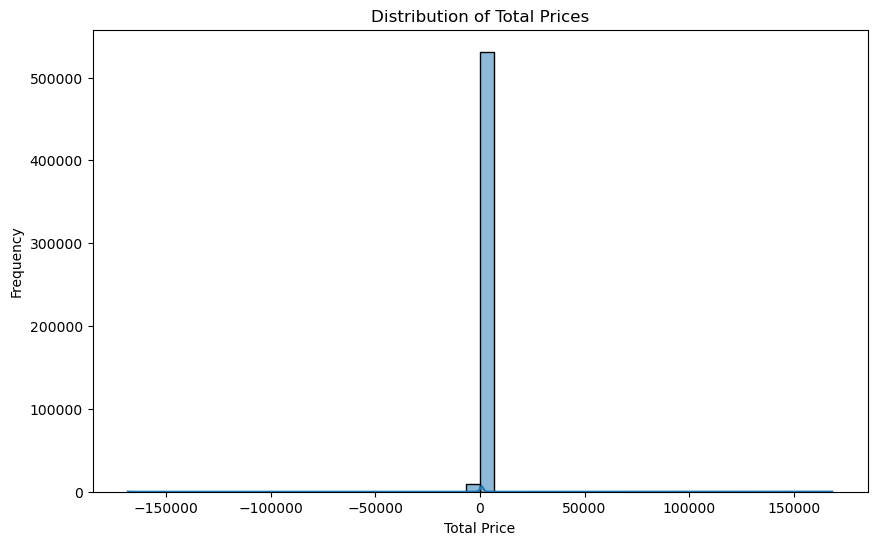

In [22]:






plt.figure(figsize=(10, 6))
sns.histplot(data['Total Price'], bins=50, kde=True)
plt.title('Distribution of Total Prices')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()






# 2. Temporal Analysis

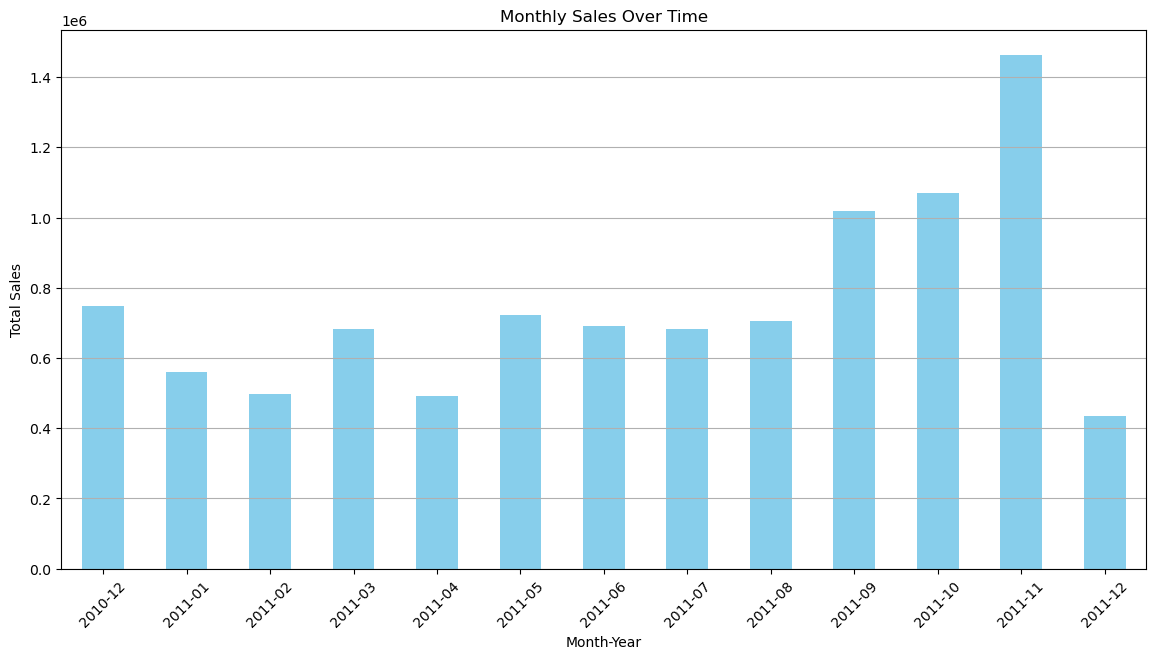

In [23]:

data['Month-Year'] = data['InvoiceDate'].dt.to_period('M')
monthly_sales = data.groupby('Month-Year')['Total Price'].sum()
plt.figure(figsize=(14, 7))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()



# 3. Customer Behavior (RFM Analysis)

In [16]:

latest_date = data['InvoiceDate'].max()
rfm = data.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'Invoice': 'count',
    'Total Price': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm['Monetary'] = rfm['Monetary'].clip(lower=0)  # Ensure no negative monetary values
print(rfm.describe())



           Recency      Frequency      Monetary
count  4373.000000    4373.000000  4.373000e+03
mean     91.026298     123.588841  2.237164e+03
std     100.763317    2032.594551  2.366987e+04
min       0.000000       1.000000  0.000000e+00
25%      16.000000      17.000000  2.934500e+02
50%      49.000000      42.000000  6.484100e+02
75%     142.000000     102.000000  1.612130e+03
max     373.000000  133624.000000  1.469806e+06


# 4. Correlation Analysis

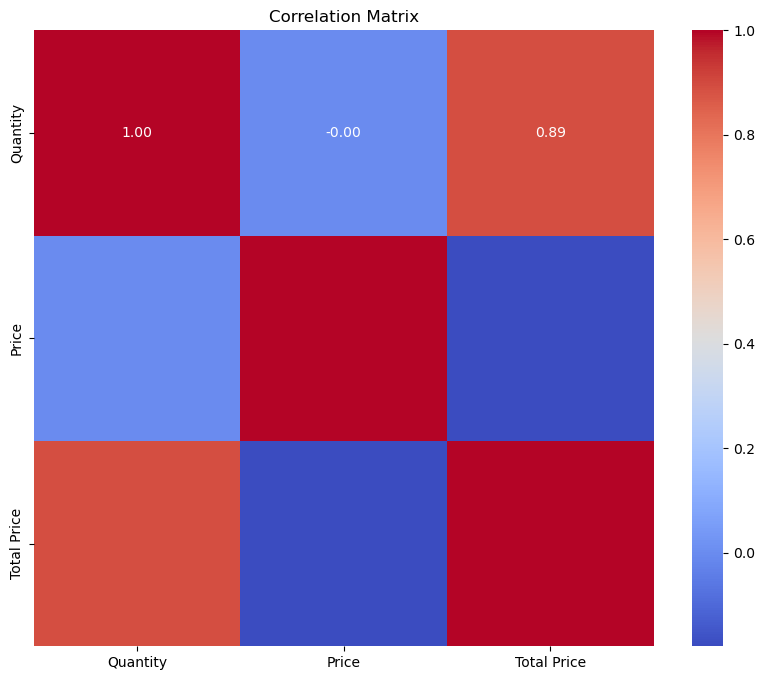

In [17]:

plt.figure(figsize=(10, 8))
correlation_matrix = data[['Quantity', 'Price', 'Total Price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



# 5. Advanced Insights: Scatter Plots for Relationships

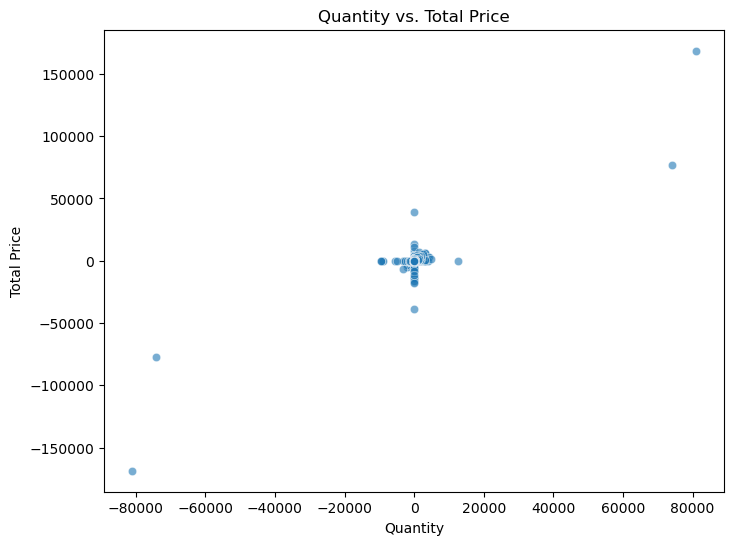

In [18]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Quantity', y='Total Price', alpha=0.6)
plt.title('Quantity vs. Total Price')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.show()



# 6. Segmentation by Country

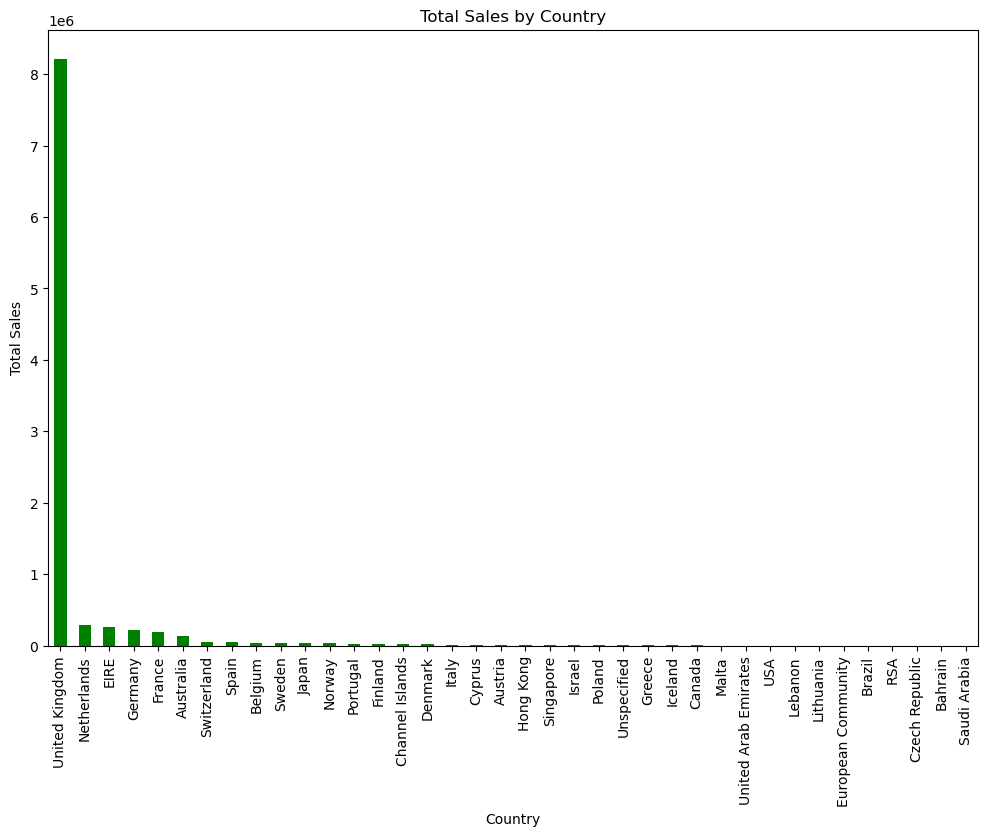

In [19]:

country_sales = data.groupby('Country')['Total Price'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
country_sales.plot(kind='bar', color='green')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()



In [53]:
print(data.columns)

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'Price',
       'Customer ID', 'Total Price', 'Month-Year', 'Year', 'Month',
       'Country_Australia', 'Country_Austria', 'Country_Bahrain',
       'Country_Belgium', 'Country_Brazil', 'Country_Canada',
       'Country_Channel Islands', 'Country_Cyprus', 'Country_Czech Republic',
       'Country_Denmark', 'Country_EIRE', 'Country_European Community',
       'Country_Finland', 'Country_France', 'Country_Germany',
       'Country_Greece', 'Country_Hong Kong', 'Country_Iceland',
       'Country_Israel', 'Country_Italy', 'Country_Japan', 'Country_Lebanon',
       'Country_Lithuania', 'Country_Malta', 'Country_Netherlands',
       'Country_Norway', 'Country_Poland', 'Country_Portugal', 'Country_RSA',
       'Country_Saudi Arabia', 'Country_Singapore', 'Country_Spain',
       'Country_Sweden', 'Country_Switzerland', 'Country_USA',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_Unspecified'],
      d

# 7. KPI Definition
# Average sales per customer

In [20]:

avg_sales_per_customer = data.groupby('Customer ID')['Total Price'].mean()
print(f"Average Sales Per Customer: {avg_sales_per_customer.mean():.2f}")

Average Sales Per Customer: 28.83


# Preprocessing and Training 

# Importing all the necessary Libraries

# Preprocessing


# Loading all the required libraries

In [65]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from joblib import dump







# Loading the cleaned datset from data wrangling

In [66]:
# Load the dataset
data = pd.read_csv('/Users/satyaprakashchallagulla/Downloads/cleaned_online_retail_II.csv')


# Identify numeric and categorical columns

In [67]:

categorical_features = ['Country']  # Add other categorical features here if applicable
numeric_features = ['Quantity', 'Price']  # Assume these are the numeric columns to be used




# Pre-Processing

In [68]:
# Setup preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [69]:

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'  # Drop other columns that are not explicitly transformed
)

# Apply preprocessing
X = data.drop(['Customer ID', 'Total Price', 'Description', 'StockCode', 'Invoice'], axis=1)  # Excluding non-feature columns and categorical descriptions
y = data['Total Price']  # Target variable
X_preprocessed = preprocessor.fit_transform(X)

# Training

In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Initialize and train models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

model_save_path = '/Users/satyaprakashchallagulla/Desktop'
os.makedirs(model_save_path, exist_ok=True)

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f'{name} - RMSE: {rmse}')
  

Linear Regression - RMSE: 175.82823084148527
Random Forest - RMSE: 90.04164716068392
Gradient Boosting - RMSE: 280.3174075508355


I have tried doing the modelling combinedly using the looping method instead of doing the modelling each accordingly.

From the RMSE results of each models i came to a conclusion that for the data that i am dealing with Random Forest would be the perfect model suitable.It has a good handling of Non-Linear Relationships and Robustness to overfitting.I was guessing that would be the perfect model and that came true.